In [1]:
import numpy as np
import pandas as pd
import joblib

import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
from scipy.signal import hamming

import librosa
import os
import math
import numpy as np
import csv
from scipy.signal import find_peaks

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score

def nota_index_in_nota_octava(nota_index):
    note = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
    nota = (nota_index - 1) % len(note)
    nota = note[nota]
    octava = (nota_index + 8) // len(note)

    return nota, octava


def frecv_in_nota_index(pitch):
    if not pitch:
        pitch += 1e-15

    nota_index = 12 * math.log2(pitch / 440) + 49
    offset_from_note = nota_index
    nota_index = round(nota_index)
    offset_from_note -= nota_index
    nota = nota_index_in_nota_octava(nota_index)

    return nota


def autocorelatie(y, sr=22050):
    corr = np.correlate(y, y, 'full')[len(y) - 1:]
    peaks, dics = find_peaks(corr, height=0)
    top = np.argsort(corr[peaks])[-2:]
    ind = top[-1]
    pitch = sr / peaks[ind]

    nota = frecv_in_nota_index(pitch)
    nota = ''.join(map(str, nota))

    return nota, pitch


def generare_onseturi(fisier_wav):
    y, sr = librosa.load(fisier_wav)
    print(sr)  #rata de esnationare
    print(len(y))  #y = duratata semnal in secunde * rata de esantionare sr
    #durata = len(y)/sr

    plt.figure(figsize=(14,5))
    librosa.display.waveshow(y, sr=sr)

    o_env = librosa.onset.onset_strength(y=y, sr=sr)
    times = librosa.times_like(o_env, sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

    print(onset_frames) # frame numbers of estimated onsets

    onset_times = librosa.frames_to_time(onset_frames)
    print(onset_times)

    y_db = 10.0 * np.log10(y)

    plt.figure(figsize=(10,5))
    librosa.display.waveshow(y, sr=sr)
    plt.vlines(onset_times, -0.3, 0.3, color = 'r')
    
    return y, sr, onset_times
    
# cadre onset-uri
def autocorelatie_onseturi(fisier_wav, fisier_csv):
    y, sr, onset_times = generare_onseturi(fisier_wav)
    durata = len(y) / sr
    timpi = np.arange(0, durata, 1/sr)
    dictionar = {}
    nr_esantion = [i for i in range(1, len(y) + 1)]
    for i in range(len(nr_esantion)):
        dictionar[nr_esantion[i]] = timpi[i]

    cadre = []
    for i in range(len(onset_times)):
        onset1 = onset_times[i]
        try:
            onset2 = onset_times[i+1]
        except IndexError:
            onset2 = timpi[-1]
        cadru_curent = []
        for j in range(len(y)):
            if j in dictionar:
                if dictionar[j] > onset1: 
                    if dictionar[j] < onset2:
                        cadru_curent.append(j)
                    else:
                        break
        cadre.append(cadru_curent)

    # fiecare onset are o lista de esantioane
    esantioane_onset = []
    for i in range(len(cadre)):
        esantioane_onset.append(y[cadre[i][0] : cadre[i][-1]])

    # note aferente fiecarui onset  
    note = []
    frecvente = []
    for i in esantioane_onset:
        nota, pitch = autocorelatie(i)
#         print(nota, pitch)
        note.append(nota)
        frecvente.append(pitch)

    with open(fisier_csv, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['pitch', 'nota'])
        randuri = []
        for i,j in zip(frecvente, note):
            randuri.append([i, j])
        writer.writerows(randuri)
        
    return 0

22050
383260
[  7  18  30  42  54  66  77  90 102 112 124 136 152 169 195 208 219 230
 240 252 263 274 286 297 308 319 335 351 388 401 412 423 434 446 457 467
 477 487 497 512 527 549 561 571 581 593 604 615 626 637 648 659 686 707
 727]
[ 0.16253968  0.41795918  0.69659864  0.9752381   1.25387755  1.53251701
  1.78793651  2.08979592  2.36843537  2.60063492  2.87927438  3.15791383
  3.52943311  3.92417234  4.52789116  4.82975057  5.08517007  5.34058957
  5.57278912  5.85142857  6.10684807  6.36226757  6.64090703  6.89632653
  7.15174603  7.40716553  7.77868481  8.15020408  9.0093424   9.31120181
  9.56662132  9.82204082 10.07746032 10.35609977 10.61151927 10.84371882
 11.07591837 11.30811791 11.54031746 11.88861678 12.2369161  12.7477551
 13.02639456 13.2585941  13.49079365 13.76943311 14.02485261 14.28027211
 14.53569161 14.79111111 15.04653061 15.30195011 15.92888889 16.41650794
 16.88090703]


C:\Users\User\AppData\Local\Temp/ipykernel_22736/2859016908.py:74: RuntimeWarning: invalid value encountered in log10
  y_db = 10.0 * np.log10(y)
D:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Eroare index cluster 25


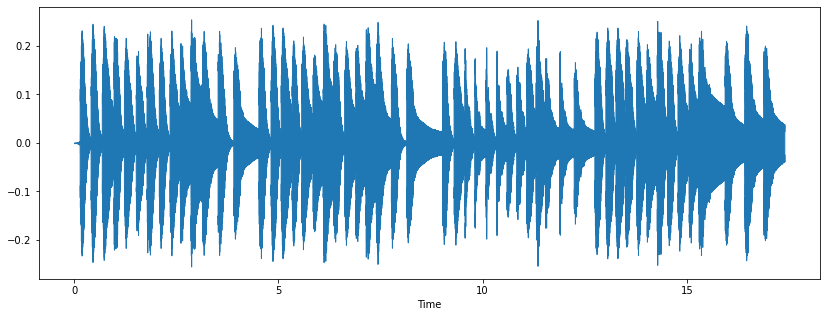

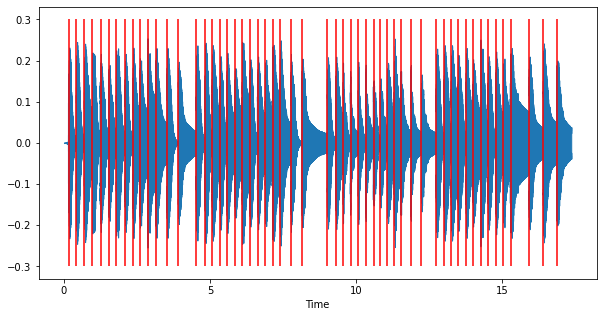

In [2]:
fisier_antrenare = 'autocor_trainsitest.csv'
fisier_wav = 'whistle3.wav'
fisier_csv = 'whistle3.csv'
# 
autocorelatie_onseturi(fisier_wav, fisier_csv)
# 

df = pd.read_csv(fisier_antrenare)
nume_fisiere = df.iloc[:, 0].values
frecvente = df.iloc[:, 1].values                     

df_semnal = pd.read_csv(fisier_csv)
frecvente_semnal = df_semnal.iloc[:, 0].values
index_frecvente_semnal = frecvente.shape[0]

frecvente = np.append(frecvente, frecvente_semnal)
X = frecvente  
X = X.reshape(-1,1)
kmeans = MiniBatchKMeans(n_clusters=37)
kmeans.fit(X)
clustere = kmeans.fit_predict(X)

y = [nume_fisiere[i][:3] if nume_fisiere[i][2] == "#" else nume_fisiere[i][:2] for i in range(len(nume_fisiere))]
le = LabelEncoder()
y_et = le.fit_transform(y)

dictionar = {}
clustere_unice = np.unique(clustere)
clustere_fara_clustere_semnal = clustere[:index_frecvente_semnal]
for i in range(len(clustere_unice)):
    masca = np.where(clustere_fara_clustere_semnal == i, 1, 0)
    aparitii_etichete = np.bincount(y_et[masca==1])
    try:
        eticheta_aleasa = aparitii_etichete.argmax()
    except ValueError:
        print('Eroare index cluster', i)
    dictionar[i] = eticheta_aleasa

clustere_semnal = clustere[index_frecvente_semnal:]
clustere_semnal_clase = np.random.rand(len(clustere_semnal))
for i in range(len(clustere_semnal)):
    clustere_semnal_clase[i] = dictionar[clustere_semnal[i]]
    
clustere_semnal_clase = np.array([int(i) for i in clustere_semnal_clase])
clustere_semnal_clase_inv = le.inverse_transform(clustere_semnal_clase)
clustere_semnal_clase_inv.tolist()
predictii = clustere_semnal_clase_inv

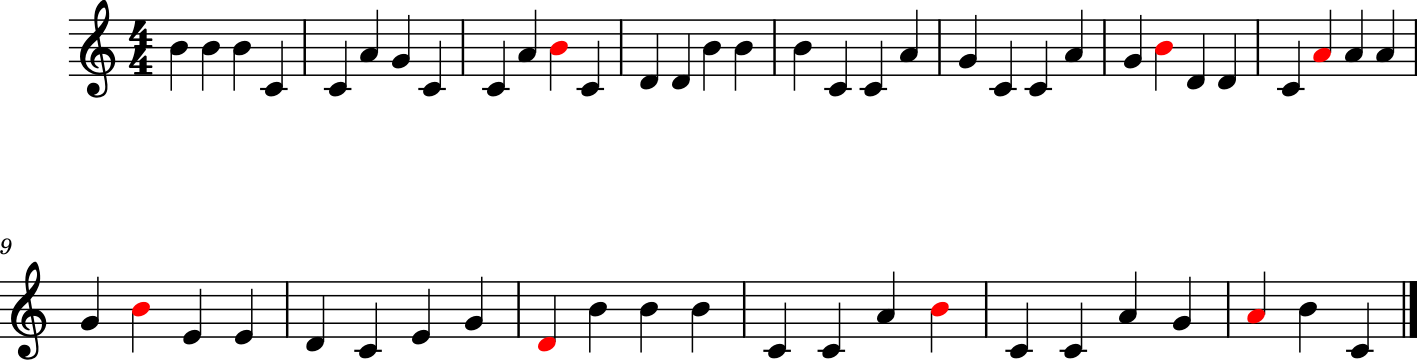

In [3]:
from music21 import *

note_prezise = predictii

note_corecte = ['B3','B3','B3','C4','C4','A3','G3','C4','C4','A3','G3','C4','D4','D4','B3','B3','B3','C4','C4','A3',
                      'G3','C4','C4','A3','G3','C4','D4','D4','C4','C4','A4','A4','G4','G4','E4','E4','D4','C4','E4','G4',
                      'E4','B3','B3','B3','C4','C4','A3','G3','C4','C4','A3','G3','D4','B3','C4']


s = stream.Stream()
for i, j in zip(note_prezise, note_corecte):
        if i[0] != j[0]:
            n = note.Note(i[0], quarterLength = 1)
            n.style.color='red'
            s.append([n])
        else:
            n = note.Note(i[0], quarterLength = 1)
            s.append([n])
    
s.show()

In [4]:
# debug

In [5]:
# dictionar[13]

In [6]:
# clustere_semnal_clase_inv.shape

In [7]:
# nume_fisiere.shape

In [8]:
# y_et

In [9]:
# clustere

In [10]:
# index_greseli_csv = []
# for i in np.where(clustere==13):
#     index_greseli_csv.append(i - index_frecvente_semnal + 2)
    
# note_corecte = ['B3','B3','B3','C4','C4','A3','G3','C4','C4','A3','G3','C4','D4','D4','B3','B3','B3','C4','C4','A3',
#                       'G3','C4','C4','A3','G3','C4','D4','D4','C4','C4','A4','A4','G4','G4','E4','E4','D4','C4','E4','G4',
#                       'E4','B3','B3','B3','C4','C4','A3','G3','C4','C4','A3','G3','D4','B3','C4']

# for i in index_greseli_csv[0]:
#     print(note_corecte[i - 2])

In [11]:
# for i in index_greseli_csv[0]:
#     print(i - 2)

In [12]:
# index_greseli

In [13]:
# masca = np.where(clustere_fara_clustere_semnal == 13, 1, 0)
# aparitii_etichete = np.bincount(y_et[masca==1])
# aparitii_etichete

In [14]:
# masca